In [1]:
import os
import pandas  as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy   as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("E:/DATA SCIENCE/Kaggle/House_Price")

In [3]:
rawdf = pd.read_csv("train.csv");rawdf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [4]:
predictdf = pd.read_csv("test.csv");predictdf.shape

(1459, 80)

In [31]:
rawdf.describe(include = 'object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [32]:
rawdf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Sampling

In [5]:
from sklearn.model_selection import train_test_split

traindf, testdf = train_test_split(rawdf, train_size = 0.8, random_state = 143)

#### "Source" Column In Train & Test

In [6]:
traindf["Source"]   = "Train"
testdf["Source"]    = "Test"
predictdf["Source"] = "Predict"

#### Adding "SalePrice" Column in predictdf

In [7]:
predictdf["SalePrice"] = 0;

In [8]:
traindf.shape

(1168, 82)

In [9]:
testdf.shape

(292, 82)

In [10]:
predictdf.shape

(1459, 82)

##### Concat Train, Test and Predict Dataset

In [11]:
furaw = pd.concat([traindf, testdf, predictdf], axis = 0);
furaw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 479 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  Overal

In [12]:
furaw.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

##### Drop "Id"  and "Month" Column

In [13]:
furaw = furaw.drop(["Id"], axis = 1)

furaw = furaw.drop(["MoSold"], axis = 1)

### Data Pre_Processing

"Removing columns that possess no credible value to model buidling and those those with more than 70% of missing values"

In [14]:
furaw = furaw.drop(["Alley","MiscFeature","GarageYrBlt",
                    "GarageFinish","LotFrontage"], axis = 1);
furaw.shape

(2919, 75)

#### Columns with Year Data

In [15]:
furaw["Build_Age"] = furaw["YrSold"] - furaw["YearBuilt"];furaw.shape

(2919, 76)

Drop Year Sold, YearBuilt & Remodel Year

In [16]:
furaw = furaw.drop(["YrSold", "YearBuilt", "YearRemodAdd"], axis = 1); furaw.shape

(2919, 73)

##### Columns with object variable

In [17]:
furaw["MSSubClass"]    = furaw["MSSubClass"].astype(object)

furaw["OverallQual"]  = furaw["OverallQual"].astype(object)

furaw["OverallCond"]   = furaw["OverallCond"].astype(object)

#### Missing Value Imputation

#### Category columns replacing NA's with Not present

NoB - No Basement

In [18]:
furaw['BsmtQual'].replace(np.nan, "NoB", inplace = True)

furaw['BsmtExposure'].replace(np.nan, "NoB", inplace = True)

furaw['BsmtFinType1'].replace(np.nan, "NoB", inplace = True)

furaw['BsmtFinType2'].replace(np.nan, "NoB", inplace = True)

furaw['BsmtCond'].replace(np.nan, "NoB", inplace = True)

NoFi -No Fire

In [19]:
furaw['FireplaceQu'].replace(np.nan, "NoFi", inplace = True)

NoG - No Garage

In [20]:
furaw['GarageType'].replace(np.nan, "NoG", inplace = True)

furaw['GarageQual'].replace(np.nan, "NoG", inplace = True)

furaw['GarageCond'].replace(np.nan, "NoG", inplace = True)

NoP - No Pool

In [21]:
furaw['PoolQC'].replace(np.nan, "NoP", inplace = True)

0 - Number of Bathrooms

In [22]:
furaw['BsmtFullBath'].replace(np.nan, 0, inplace = True)

furaw['BsmtHalfBath'].replace(np.nan, 0, inplace = True)

NoFe - No Fence

In [23]:
furaw['Fence'].replace(np.nan, "NoFe", inplace = True)

#### Replaced by Mode value

In [24]:
furaw['KitchenQual'].replace(np.nan, "TA", inplace = True)

furaw['SaleType'].replace(np.nan, "WD", inplace = True)

furaw['Functional'].replace(np.nan, "TF", inplace = True)

furaw['MasVnrType'].replace(np.nan, "None", inplace = True)

furaw['Electrical'].replace(np.nan, "SBrKr", inplace = True)

furaw['Utilities'].replace(np.nan, "AllPub", inplace = True)

furaw['Exterior1st'].replace(np.nan, "VinylSd", inplace = True)

furaw['Exterior2nd'].replace(np.nan, "VinylSd", inplace = True)

furaw['MSZoning'].replace(np.nan, "RLD", inplace = True)

#### Replaced by Median value

In [25]:
furaw['GarageCars'].replace(np.nan, 2, inplace = True)

furaw['MasVnrArea'].replace(np.nan, 0, inplace = True)

furaw['GarageArea'].replace(np.nan, 477, inplace = True)

furaw['BsmtFinSF2'].replace(np.nan, 0, inplace = True)

furaw['BsmtUnfSF'].replace(np.nan, 467, inplace = True)

furaw['TotalBsmtSF'].replace(np.nan, 989, inplace = True)

furaw['BsmtFinSF1'].replace(np.nan, 368, inplace = True)

In [26]:
furaw.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu 

In [27]:
furaw.shape

(2919, 73)

#### Corrected Dataset Extracted!

In [28]:
furaw.to_csv("Fullraw.csv", index = False)

#### Correlation Check

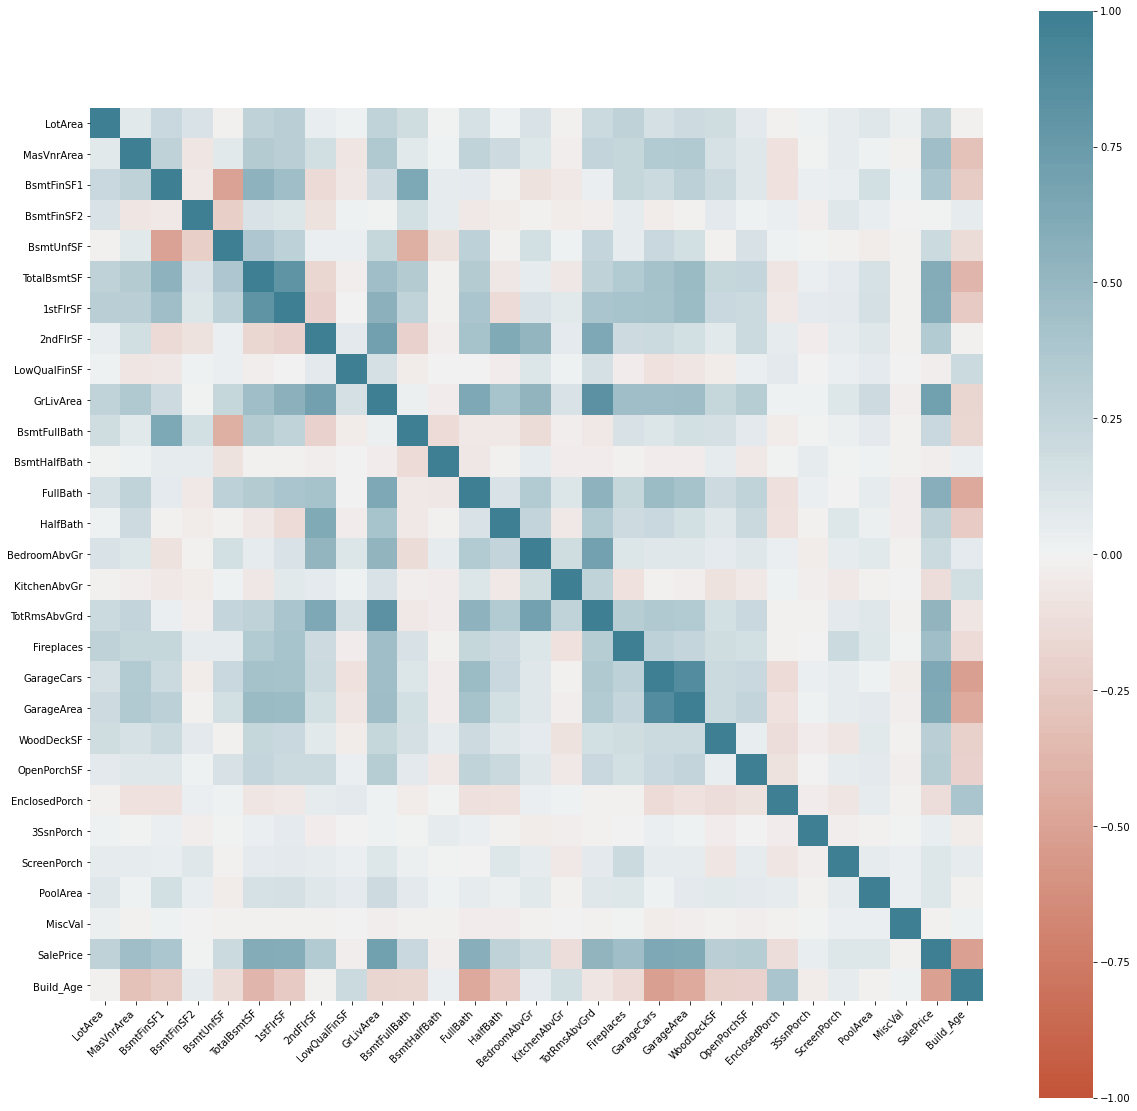

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

corrDf = furaw[furaw["Source"] == "Train"].corr()

ax = sns.heatmap( corrDf, 
                  vmin=-1, vmax=1, center=0,
                  cmap=sns.diverging_palette(20, 220, n=200),
                  square=True )
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right');

#### Dummy Variable Creation

In [33]:
fullRaw = pd.get_dummies(furaw, drop_first = True) 

fullRaw.shape

(2919, 280)

### Sampling

In [34]:
trainDf      = fullRaw[fullRaw['Source_Train'] == 1].drop(['Source_Train', 'Source_Test'], axis = 1).copy()

testDf       = fullRaw[fullRaw['Source_Test'] == 1].drop(['Source_Train', 'Source_Test'], axis = 1).copy()

predictDf    = fullRaw[(fullRaw['Source_Train'] == 0) & 
                        (fullRaw['Source_Test'] == 0)].drop(['Source_Train', 'Source_Test'], axis = 1).copy()

#### Divide into Xs (Indepenedents) and Y (Dependent)

In [36]:
trainX = trainDf.drop(['SalePrice'], axis = 1).copy()
trainY = trainDf['SalePrice'].copy()

testX  = testDf.drop(['SalePrice'], axis = 1).copy()
testY  = testDf['SalePrice'].copy()

#### Add intercept Column

In [37]:
from statsmodels.api import add_constant

trainX    = add_constant(trainX)
predictDf = add_constant(predictDf)

In [38]:
testX     = add_constant(testX, has_constant='add')

In [40]:
print( "trainX: " , trainX.shape)

print( "testX: "  , testX.shape)

print( "predictDf: "  , predictDf.shape)

trainX:  (1168, 278)
testX:  (292, 278)
predictDf:  (1459, 279)


#### VIF Check

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

tempMaxVIF = 5 
maxVIF     = 5
trainXCopy = trainX.copy()
counter    = 1
highVIFColumnNames = []

while (tempMaxVIF >= maxVIF):
    
    print(counter)
    
    tempVIFDf = pd.DataFrame()
    
    tempVIFDf['VIF'] = [variance_inflation_factor(trainXCopy.values, i) for i in range(trainXCopy.shape[1])]
    
    tempVIFDf['Column_Name'] = trainXCopy.columns
    
    tempVIFDf.dropna(inplace=True)
    
    tempColumnName = tempVIFDf.sort_values(["VIF"], ascending = False).iloc[0,1]
    
    tempMaxVIF = tempVIFDf.sort_values(["VIF"], ascending = False).iloc[0,0]
    
    print(tempColumnName)
    
    if (tempMaxVIF >= maxVIF):
        
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highVIFColumnNames.append(tempColumnName)
    
    counter = counter + 1

highVIFColumnNames

1
OverallCond_6
2
OverallQual_4
3
BsmtQual_NoB
4
BldgType_Duplex
5
BsmtCond_NoB
6
GrLivArea
7
BsmtFinType2_NoB
8
GarageType_NoG
9
GarageCond_NoG
10
Electrical_Mix
11
Exterior2nd_CBlock
12
BsmtFinSF1
13
const
14
PoolQC_NoP
15
GarageCond_TA
16
RoofMatl_CompShg
17
Condition2_Norm
18
Heating_GasA
19
GarageQual_TA
20
RoofStyle_Gable
21
ExterCond_TA
22
Street_Pave
23
MSZoning_RL
24
GarageType_Attchd
25
Exterior1st_VinylSd
26
1stFlrSF
27
KitchenAbvGr
28
BsmtFinType2_Unf
29
Functional_Typ
30
HouseStyle_1Story
31
TotRmsAbvGrd
32
MasVnrType_None
33
Exterior2nd_MetalSd
34
BldgType_TwnhsE
35
GarageCars
36
ExterQual_TA
37
TotalBsmtSF
38
BsmtCond_TA
39
HouseStyle_2Story
40
FireplaceQu_NoFi
41
SaleType_WD
42
CentralAir_Y
43
BldgType_2fmCon
44
SaleCondition_Partial
45
BedroomAbvGr
46
Build_Age
47
Condition1_Norm
48
FullBath
49
BsmtFinType1_NoB
50
LandContour_Lvl
51
PavedDrive_Y
52
Exterior2nd_VinylSd
53
Fence_NoFe
54
Exterior1st_CemntBd
55
HouseStyle_SLvl
56
Electrical_SBrkr
57
KitchenQual_TA
58
Garag

['OverallCond_6',
 'OverallQual_4',
 'BsmtQual_NoB',
 'BldgType_Duplex',
 'BsmtCond_NoB',
 'GrLivArea',
 'BsmtFinType2_NoB',
 'GarageType_NoG',
 'GarageCond_NoG',
 'Electrical_Mix',
 'Exterior2nd_CBlock',
 'BsmtFinSF1',
 'const',
 'PoolQC_NoP',
 'GarageCond_TA',
 'RoofMatl_CompShg',
 'Condition2_Norm',
 'Heating_GasA',
 'GarageQual_TA',
 'RoofStyle_Gable',
 'ExterCond_TA',
 'Street_Pave',
 'MSZoning_RL',
 'GarageType_Attchd',
 'Exterior1st_VinylSd',
 '1stFlrSF',
 'KitchenAbvGr',
 'BsmtFinType2_Unf',
 'Functional_Typ',
 'HouseStyle_1Story',
 'TotRmsAbvGrd',
 'MasVnrType_None',
 'Exterior2nd_MetalSd',
 'BldgType_TwnhsE',
 'GarageCars',
 'ExterQual_TA',
 'TotalBsmtSF',
 'BsmtCond_TA',
 'HouseStyle_2Story',
 'FireplaceQu_NoFi',
 'SaleType_WD',
 'CentralAir_Y',
 'BldgType_2fmCon',
 'SaleCondition_Partial',
 'BedroomAbvGr',
 'Build_Age',
 'Condition1_Norm',
 'FullBath',
 'BsmtFinType1_NoB',
 'LandContour_Lvl',
 'PavedDrive_Y',
 'Exterior2nd_VinylSd',
 'Fence_NoFe',
 'Exterior1st_CemntBd',
 '

##### Exclude 'const' column from getting dropped/ removed

In [42]:
highVIFColumnNames.remove('const') 

highVIFColumnNames

['OverallCond_6',
 'OverallQual_4',
 'BsmtQual_NoB',
 'BldgType_Duplex',
 'BsmtCond_NoB',
 'GrLivArea',
 'BsmtFinType2_NoB',
 'GarageType_NoG',
 'GarageCond_NoG',
 'Electrical_Mix',
 'Exterior2nd_CBlock',
 'BsmtFinSF1',
 'PoolQC_NoP',
 'GarageCond_TA',
 'RoofMatl_CompShg',
 'Condition2_Norm',
 'Heating_GasA',
 'GarageQual_TA',
 'RoofStyle_Gable',
 'ExterCond_TA',
 'Street_Pave',
 'MSZoning_RL',
 'GarageType_Attchd',
 'Exterior1st_VinylSd',
 '1stFlrSF',
 'KitchenAbvGr',
 'BsmtFinType2_Unf',
 'Functional_Typ',
 'HouseStyle_1Story',
 'TotRmsAbvGrd',
 'MasVnrType_None',
 'Exterior2nd_MetalSd',
 'BldgType_TwnhsE',
 'GarageCars',
 'ExterQual_TA',
 'TotalBsmtSF',
 'BsmtCond_TA',
 'HouseStyle_2Story',
 'FireplaceQu_NoFi',
 'SaleType_WD',
 'CentralAir_Y',
 'BldgType_2fmCon',
 'SaleCondition_Partial',
 'BedroomAbvGr',
 'Build_Age',
 'Condition1_Norm',
 'FullBath',
 'BsmtFinType1_NoB',
 'LandContour_Lvl',
 'PavedDrive_Y',
 'Exterior2nd_VinylSd',
 'Fence_NoFe',
 'Exterior1st_CemntBd',
 'HouseStyle

In [43]:
trainX    = trainX.drop(highVIFColumnNames, axis = 1)

testX     = testX.drop(highVIFColumnNames, axis = 1)

predictDf = predictDf.drop(highVIFColumnNames, axis = 1)

### Model Building

In [44]:
from statsmodels.api import OLS

m1ModelDef = OLS(trainY, trainX)

m1ModelBuild = m1ModelDef.fit() 

m1ModelBuild.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     30.55
Date:                Wed, 02 Feb 2022   Prob (F-statistic):          1.03e-308
Time:                        00:39:41   Log-Likelihood:                -13686.
No. Observations:                1168   AIC:                         2.776e+04
Df Residuals:                     974   BIC:                         2.874e+04
Df Model:                         193                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.512e+05   6590.337     22.940      0.000    1.38e+05    1.64e+05
MasVnrArea               33.3073      8.734      3.813      0.000      16.167      50.448
BsmtFinSF2               10.2874      9.425      1.091      0.275      -8.209      28.783
LowQualFinSF              9.9398     26.635      0.373      0.709     -42.328      62.208
BsmtFullBath           6189.8372   2769.417      2.235      0.026     755.125    1.16e+04
BsmtHalfBath           1526.6021   4523.778      0.337      0.736   -7350.871    1.04e+04
HalfBath               2767.7222   3008.191      0.920      0.358   -3135.560    8671.004
WoodDeckSF               33.5464      9.232      3.634      0.000      15.429      51.663
OpenPorchSF              44.5703     18.614      2.395      0.017       8.043      81.098
EnclosedPorch            32.4021     18.713      1.731      0.084      -4.321      69.125
3SsnPorch                69.5507     37.290      1.865      0.062      -3.628     142.729
ScreenPorch              61.3838     20.040      3.063      0.002      22.057     100.711
MiscVal                   0.1782      2.085      0.085      0.932      -3.914       4.270
MSSubClass_30         -2.246e+04   6422.792     -3.497      0.000   -3.51e+04   -9854.125
MSSubClass_40         -1.254e+04   2.08e+04     -0.603      0.546   -5.34e+04    2.83e+04
MSSubClass_45         -1.461e+04   1.27e+04     -1.151      0.250   -3.95e+04    1.03e+04
MSSubClass_50           504.2079   5102.862      0.099      0.921   -9509.663    1.05e+04
MSSubClass_60          1.269e+04   4231.463      2.999      0.003    4386.518     2.1e+04
MSSubClass_70          3051.1518   7214.819      0.423      0.672   -1.11e+04    1.72e+04
MSSubClass_80         -4312.9935   5826.075     -0.740      0.459   -1.57e+04    7120.111
MSSubClass_85          1.622e+04   1.55e+04      1.046      0.296   -1.42e+04    4.67e+04
MSSubClass_90          1.751e+04   7957.114      2.200      0.028    1892.821    3.31e+04
MSSubClass_120         -3.32e+04   5223.838     -6.356      0.000   -4.35e+04    -2.3e+04
MSSubClass_150        -1.217e-10   1.18e-10     -1.030      0.303   -3.53e-10     1.1e-10
MSSubClass_160        -2.945e+04   9505.404     -3.098      0.002   -4.81e+04   -1.08e+04
MSSubClass_180        -2.665e+04      2e+04     -1.330      0.184    -6.6e+04    1.27e+04
MSSubClass_190        -1.151e+04   8121.380     -1.417      0.157   -2.74e+04    4432.134
MSZoning_FV            2.123e+04   6973.000      3.044      0.002    7542.840    3.49e+04
MSZoning_RH            6673.5967   1.04e+04      0.640      0.522   -1.38e+04    2.71e+04
MSZoning_RLD           2.988e-11   9.83e-11      0.304      0.761   -1.63e-10    2.23e-10
MSZoning_RM           -2889.6007   4286.118     -0.674      0.500   -1.13e+04    5521.488
LotShape_IR2           

###### Extract/ Identify p-values from model

In [45]:
dir(m1ModelBuild)

m1ModelBuild.pvalues

const                    1.875328e-93
MasVnrArea               1.457203e-04
BsmtFinSF2               2.753310e-01
LowQualFinSF             7.090883e-01
BsmtFullBath             2.563891e-02
BsmtHalfBath             7.358415e-01
HalfBath                 3.577682e-01
WoodDeckSF               2.939954e-04
OpenPorchSF              1.683073e-02
EnclosedPorch            8.368185e-02
3SsnPorch                6.246488e-02
ScreenPorch              2.251226e-03
MiscVal                  9.319147e-01
MSSubClass_30            4.924078e-04
MSSubClass_40            5.464562e-01
MSSubClass_45            2.502071e-01
MSSubClass_50            9.213104e-01
MSSubClass_60            2.777111e-03
MSSubClass_70            6.724611e-01
MSSubClass_80            4.593016e-01
MSSubClass_85            2.960111e-01
MSSubClass_90            2.802117e-02
MSSubClass_120           3.177961e-10
MSSubClass_150           3.031998e-01
MSSubClass_160           2.003056e-03
MSSubClass_180           1.839706e-01
MSSubClass_1

#### Model Optimization

In [46]:
tempMaxPValue = 0.1
maxPValue = 0.1
trainXCopy = trainX.copy()
counter = 1
highPValueColumnNames = []

while (tempMaxPValue >= maxPValue):
    
    print(counter)    
    
    tempModelDf = pd.DataFrame()    
    Model = OLS(trainY, trainXCopy).fit()
    tempModelDf['PValue'] = Model.pvalues
    tempModelDf['Column_Name'] = trainXCopy.columns
    tempModelDf.dropna(inplace=True) 
    tempColumnName = tempModelDf.sort_values(["PValue"], ascending = False).iloc[0,1]
    tempMaxPValue = tempModelDf.sort_values(["PValue"], ascending = False).iloc[0,0]
    
    if (tempMaxPValue >= maxPValue): 
        print(tempColumnName, tempMaxPValue)    
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highPValueColumnNames.append(tempColumnName)
    
    counter = counter + 1

highPValueColumnNames

1
BldgType_Twnhs 0.9988977622659606
2
SaleType_ConLw 0.9889299155231301
3
Exterior2nd_Other 0.9959824621136335
4
ExterQual_Fa 0.9846633023725417
5
Exterior2nd_Brk Cmn 0.9843017764252779
6
BsmtFinType1_LwQ 0.9841047763905257
7
Neighborhood_Sawyer 0.9770777794643816
8
BsmtFinType2_LwQ 0.9527949912100815
9
MiscVal 0.9306173539550545
10
MasVnrType_BrkFace 0.9287191302273518
11
MSSubClass_50 0.9294242001544506
12
Functional_Min1 0.9177385426482876
13
Foundation_Slab 0.9156817934156658
14
MSSubClass_150 0.9812993189254358
15
BsmtFinType1_Rec 0.9127268600617805
16
Exterior1st_AsphShn 0.9066708180183369
17
RoofStyle_Gambrel 0.9073359486308756
18
LotShape_IR3 0.9044132192119961
19
Electrical_FuseP 0.906225897178365
20
Exterior1st_BrkComm 0.8863158225139507
21
GarageCond_Fa 0.8978441075721533
22
Neighborhood_BrkSide 0.883225082589982
23
BsmtQual_Gd 0.8824954592180606
24
SaleType_Con 0.8816174986676852
25
Condition2_RRAe 0.9530521891108966
26
Utilities_NoSeWa 0.9253926281687022
27
MSZoning_RLD 0.

['BldgType_Twnhs',
 'SaleType_ConLw',
 'Exterior2nd_Other',
 'ExterQual_Fa',
 'Exterior2nd_Brk Cmn',
 'BsmtFinType1_LwQ',
 'Neighborhood_Sawyer',
 'BsmtFinType2_LwQ',
 'MiscVal',
 'MasVnrType_BrkFace',
 'MSSubClass_50',
 'Functional_Min1',
 'Foundation_Slab',
 'MSSubClass_150',
 'BsmtFinType1_Rec',
 'Exterior1st_AsphShn',
 'RoofStyle_Gambrel',
 'LotShape_IR3',
 'Electrical_FuseP',
 'Exterior1st_BrkComm',
 'GarageCond_Fa',
 'Neighborhood_BrkSide',
 'BsmtQual_Gd',
 'SaleType_Con',
 'Condition2_RRAe',
 'Utilities_NoSeWa',
 'MSZoning_RLD',
 'BsmtFinType1_BLQ',
 'Functional_Sev',
 'Electrical_SBrKr',
 'Foundation_Stone',
 'RoofMatl_Roll',
 'ExterCond_Fa',
 'Functional_TF',
 'RoofStyle_Shed',
 'Condition2_RRNn',
 'ExterCond_Gd',
 'Exterior1st_Stucco',
 'BsmtCond_Gd',
 'Neighborhood_BrDale',
 'GarageCond_Po',
 'GarageQual_Po',
 'OverallCond_2',
 'SaleType_CWD',
 'BsmtHalfBath',
 'Heating_Wall',
 'Neighborhood_Gilbert',
 'SaleType_ConLD',
 'GarageCond_Gd',
 'RoofMatl_Tar&Grv',
 'SaleCondition_

### Final Model

In [47]:
trainX = trainX.drop(highPValueColumnNames, axis = 1)

testX = testX.drop(highPValueColumnNames, axis = 1)

predictDf = predictDf.drop(highPValueColumnNames, axis = 1)

In [48]:
print("trainX: ", trainX.shape)

print("testX: ", testX.shape)

print("predictDf: ", predictDf.shape)

trainX:  (1168, 73)
testX:  (292, 73)
predictDf:  (1459, 74)


In [49]:
Model = OLS(trainY, trainX).fit()

Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     84.44
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:46:55   Log-Likelihood:                -13729.
No. Observations:                1168   AIC:                         2.760e+04
Df Residuals:                    1095   BIC:                         2.797e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.507e+05   4226.529     35.647      0.000    1.42e+05    1.59e+05
MasVnrArea              33.6150      6.590      5.101      0.000      20.685      46.545
BsmtFullBath          6047.0665   2363.272      2.559      0.011    1410.013    1.07e+04
WoodDeckSF              34.9437      8.402      4.159      0.000      18.458      51.429
OpenPorchSF             51.8024     16.789      3.086      0.002      18.860      84.745
EnclosedPorch           32.1503     16.654      1.930      0.054      -0.528      64.829
ScreenPorch             79.1747     18.303      4.326      0.000      43.262     115.088
MSSubClass_30        -2.902e+04   4827.682     -6.011      0.000   -3.85e+04   -1.95e+04
MSSubClass_60         1.567e+04   3054.601      5.130      0.000    9677.099    2.17e+04
MSSubClass_90         1.429e+04   6420.209      2.225      0.026    1687.877    2.69e+04
MSSubClass_120       -3.138e+04   4513.804     -6.953      0.000   -4.02e+04   -2.25e+04
MSSubClass_160       -2.181e+04   5696.337     -3.829      0.000    -3.3e+04   -1.06e+04
MSSubClass_180       -2.969e+04   1.61e+04     -1.840      0.066   -6.13e+04    1965.347
MSZoning_FV           2.153e+04   5641.176      3.816      0.000    1.05e+04    3.26e+04
LotConfig_CulDSac     1.384e+04   3943.181      3.510      0.000    6105.093    2.16e+04
Neighborhood_ClearCr  1.908e+04   7508.640      2.541      0.011    4343.374    3.38e+04
Neighborhood_CollgCr  9022.7564   3709.907      2.432      0.015    1743.425    1.63e+04
Neighborhood_Crawfor  3.532e+04   5492.330      6.431      0.000    2.45e+04    4.61e+04
Neighborhood_Edwards -8357.8546   4109.542     -2.034      0.042   -1.64e+04    -294.387
Neighborhood_IDOTRR  -2.094e+04   6519.561     -3.213      0.001   -3.37e+04   -8152.192
Neighborhood_MeadowV -3.323e+04   1.28e+04     -2.592      0.010   -5.84e+04   -8073.671
Neighborhood_NWAmes   9135.8117   4775.742      1.913      0.056    -234.828    1.85e+04
Neighborhood_NoRidge  6.836e+04   7409.092      9.227      0.000    5.38e+04    8.29e+04
Neighborhood_NridgHt  4.141e+04   5758.796      7.191      0.000    3.01e+04    5.27e+04
Neighborhood_SawyerW  1.052e+04   5026.182      2.093      0.037     657.899    2.04e+04
Neighborhood_StoneBr  5.332e+04   8211.748      6.493      0.000    3.72e+04    6.94e+04
Neighborhood_Timber   1.776e+04   6599.726      2.691      0.007    4812.139    3.07e+04
Condition1_Feedr     -1.026e+04   4240.733     -2.419      0.016   -1.86e+04   -1937.745
Condition2_PosN      -1.015e+05    3.4e+04     -2.987      0.003   -1.68e+05   -3.48e+04
HouseStyle_2.5Fin     2.793e+04   1.28e+04      2.178      0.030    2772.516    5.31e+04
HouseStyle_2.5Unf    -2.018e+04   1.13e+04     -1.785      0.074   -4.24e+04    1997.231
HouseStyle_SFoyer    -1.633e+04   6712.459     -2.434    

#### Model Prediction

In [50]:
Test_Pred = Model.predict(testX); Test_Pred[0:6]

487     175871.838612
1145    129511.239204
293     217684.098194
705     124877.488348
962     120163.932059
972     118514.699658
dtype: float64

In [51]:
testY[:6]

487     175000
1145    149000
293     235000
705      55000
962     155000
972      99500
Name: SalePrice, dtype: int64

##### Model Diagnostics

<AxesSubplot:>

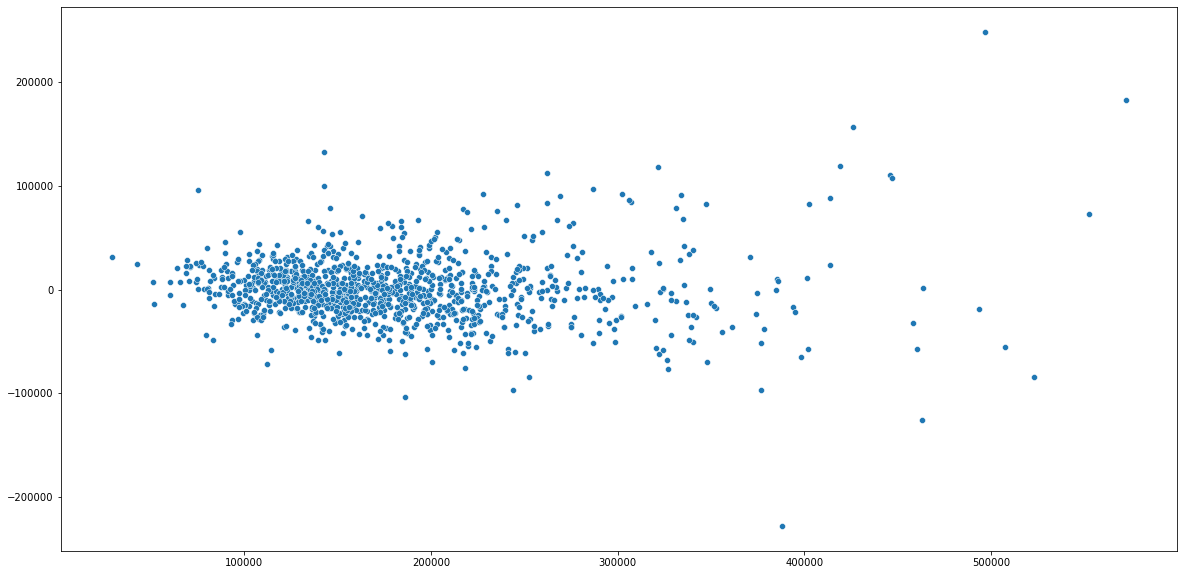

In [52]:
plt.figure(figsize=(20,10))

sns.scatterplot(Model.fittedvalues, Model.resid)

#### Normality of Errors:Check

<AxesSubplot:ylabel='Density'>

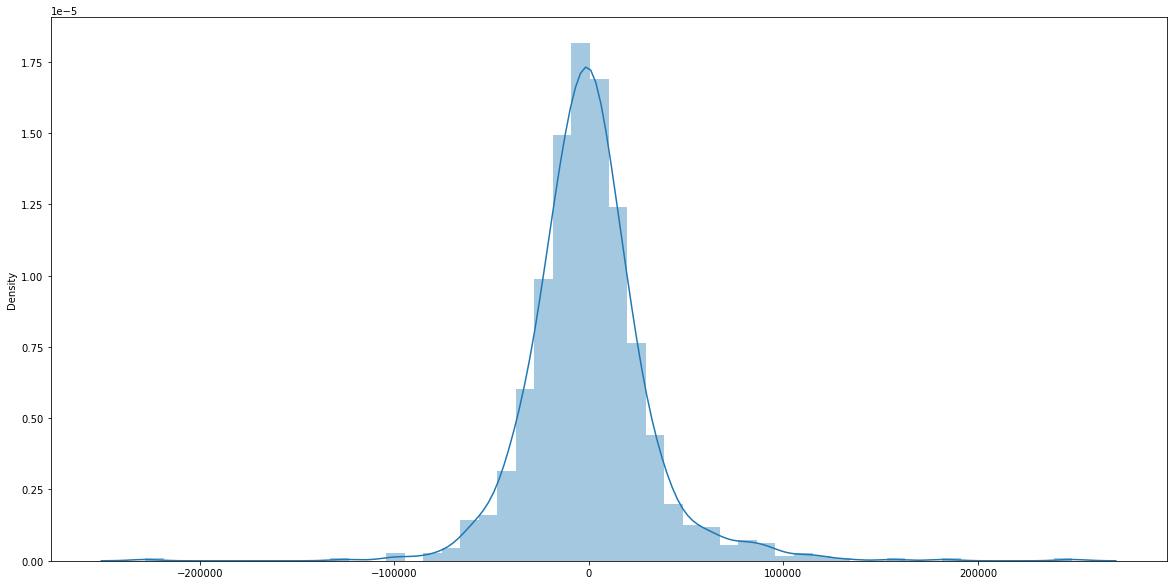

In [53]:
plt.figure(figsize=(20,10))

sns.distplot(Model.resid)

### MAPE

In [54]:
np.mean(np.abs(((testY - Test_Pred)/testY)))*100

15.188483294237829

### RMSE

In [55]:
np.sqrt(np.mean((testY - Test_Pred)**2))

37112.70594329344

##### Prediction on Sample

In [56]:
predictDf["Predicted_SalePrice"] = Model.predict(predictDf.drop(["SalePrice"], axis = 1))

In [57]:
predictDf.to_csv("Predicted_SalePrice.csv", index = True)

### Thank You